Transformación de los dataset

## Simulaciones

In [1]:
import numpy as np
import pandas as pd
import csv
titletwo=np.zeros(225)
df = pd.read_csv("dataset_f.csv", index_col=False, header=None)
print(df.shape)

(1920, 227)


In [2]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
1915,2.620502,-9.392025,1.096891,0.004746,0.019940,-0.003336,-0.260396,0.797912,0.422978,5.763486,...,20.0,2.0,44.0,0.0,23.0,30.0,37.0,39.0,3.0,7.0
1916,2.613423,-9.398851,1.076954,0.002945,0.019623,-0.003357,-0.259043,0.797360,0.422839,5.775472,...,47.0,41.0,28.0,38.0,57.0,7.0,11.0,4.0,3.0,7.0
1917,2.614750,-9.397350,1.090521,0.001259,0.022382,-0.002332,-0.258816,0.798458,0.424859,5.775306,...,36.0,59.0,16.0,29.0,37.0,4.0,61.0,30.0,3.0,7.0
1918,2.620167,-9.397014,1.092198,0.003449,0.018163,-0.000546,-0.261285,0.797249,0.424286,5.763515,...,47.0,31.0,3.0,4.0,57.0,4.0,39.0,39.0,3.0,7.0
1919,2.615565,-9.398614,1.077036,0.002947,0.016205,-0.002618,-0.261380,0.797910,0.423080,5.774897,...,36.0,35.0,6.0,11.0,37.0,35.0,33.0,52.0,3.0,7.0


In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,3.777351,-2.486878,4.648474,0.001616,0.017105,-0.002561,-0.310352,0.197665,-0.334433,2.880359,...,35.952083,37.051563,40.265104,35.010417,39.420313,46.440104,47.362500,45.436979,1.500000,3.500000
std,5.430197,3.665011,3.413925,0.012204,0.009874,0.003101,0.487867,0.484501,0.379487,4.387556,...,18.137073,17.341824,16.321357,19.407881,19.053418,18.190027,18.371247,18.612703,1.118325,2.291885
min,-4.850537,-9.782885,-4.291986,-0.177847,-0.025571,-0.038129,-1.134073,-0.563008,-0.847034,-7.121970,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.716694,-3.359809,2.322010,-0.000017,0.017071,-0.003589,-0.741835,-0.301244,-0.710636,-0.281697,...,20.000000,25.000000,29.000000,17.000000,23.000000,35.750000,38.000000,32.000000,0.750000,1.750000
50%,5.625750,-0.914249,4.604968,0.001267,0.019474,-0.002799,-0.286326,0.195445,-0.327284,1.239879,...,39.000000,37.000000,45.000000,38.000000,44.000000,56.000000,59.000000,55.000000,1.500000,3.500000
75%,9.028887,-0.020013,7.709964,0.002807,0.021131,-0.001720,0.195077,0.639759,-0.007163,8.247352,...,50.000000,51.000000,55.000000,53.000000,57.000000,61.000000,61.000000,61.000000,2.250000,5.250000
max,9.799048,1.818098,9.791012,0.316955,0.059545,0.038000,0.512453,1.028973,0.424859,9.525235,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,3.000000,7.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Columns: 226 entries, 0 to 225
dtypes: float64(226)
memory usage: 3.3 MB


In [12]:
df.shape

(1920, 227)

In [3]:
numpy_matrix = df.values
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]

In [36]:
from sklearn.model_selection import GroupKFold
from numpy import random
import math
import numpy.matlib
from scipy import stats
import scipy as sc
import operator
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

numpy_matrix = df.as_matrix()
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]
X.shape

i=0
groups = np.array(personsLabel)
print(groups.shape)

group_kfold = GroupKFold(n_splits=8)
group_kfold.get_n_splits(X, Y, groups)

for train_index, test_index in group_kfold.split(X, Y, groups):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    media = np.mean(X_train)
    desvia = np.std(X_train)
    Xtrain = sc.stats.stats.zscore(X_train)
    Xtest = (X_test - np.matlib.repmat(media, X_test.shape[0], 1))/np.matlib.repmat(desvia, X_test.shape[0], 1)
    
    parameters = {'n_neighbors':[1,7]}

    neigh = KNeighborsClassifier()
   
    groups = np.array(personsLabel)
   
    group_kfold = GroupKFold(n_splits=7)
    #group_kfold.get_n_splits(X, Y, groups)

    clf = GridSearchCV(neigh, parameters, cv=group_kfold.split(X_train, y_train, groups[train_index]))
    clf.fit(X_train,y_train)
    print(clf.best_estimator_)
    

    

    

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


(1920,)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='

[0. 0. 0. ... 7. 7. 7.]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 3., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 0., 0., 2., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 3., 3., 2., 3.,
       2., 2., 3., 3., 3., 3., 2., 3., 3., 0., 2., 0., 2., 3., 2., 3., 3.,
       0., 0., 2., 2., 2., 2., 2., 2., 3., 3., 2., 3., 2., 2., 2., 2., 3.,
       2., 2., 2., 2., 2.

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
y_predict=clf.predict(X_test)

print(y_predict)
print('Accuracy: ', accuracy_score(y_test, y_predict), '\n')
report = classification_report(y_test, y_predict)
print("\nclassification report :\n",report )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 3. 3. 2. 3. 3. 2. 3. 2. 2. 3. 3. 3.
 0. 2. 3. 3. 0. 2. 3. 2. 0. 2. 3. 2. 3. 3. 2. 2. 2. 2. 2. 2. 2. 3. 2. 3.
 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.]
Accuracy:  0.8083333333333333 


classification report :
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        60
         1.0       1.00      0.98      0.99        60
         2.0       0.59      0.95      0.73     

Text(0.5, 1.0, 'Matriz de confusión')

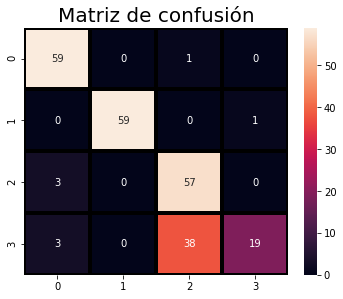

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)